In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes_excelr.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
def handle_outliers(df):
    for col in df.columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
        
        df[col]=df[col].clip(lower_limit,upper_limit)
    return df

In [8]:
handle_outliers(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72,23,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,0,0.0,30.1,0.349,47.0,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

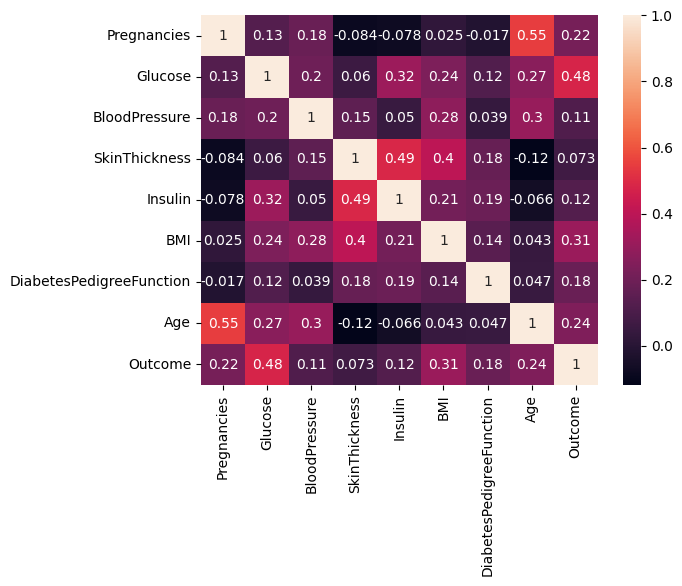

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
X=df.drop('Outcome',axis=1)

In [13]:
y=df['Outcome']

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
pipe=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ('lr',LogisticRegression())])

In [18]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [20]:
y_pred=pipe.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report

In [22]:
round(accuracy_score(y_test,y_pred),2)

0.75

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [27]:
from sklearn.metrics import roc_curve,roc_auc_score

In [37]:
y_pred_prob=pipe.predict_proba(X_test)[:,1]

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [46]:
auc_score=roc_auc_score(y_test,y_pred_prob)
print(f"AUC score:{round(auc_score,2)}")

AUC score:0.81


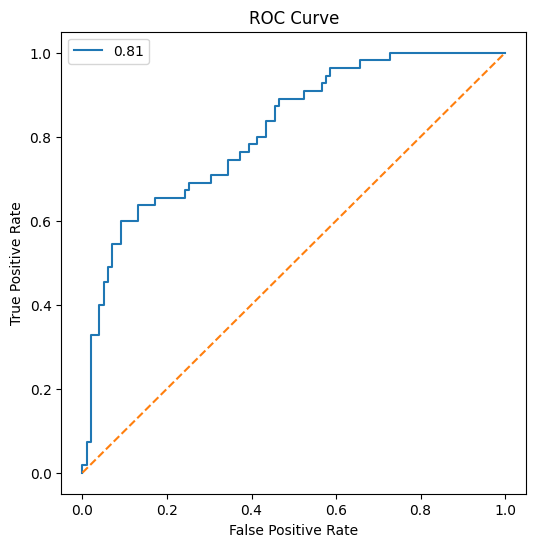

In [60]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label=round(auc_score,2))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [63]:
import pickle 
pickle.dump(pipe,open('excelr_model.pkl','wb'))